## Diabeties Prediction Using Logistic Regression, Random Forest and XGboost

#### Machine Learning Canvas

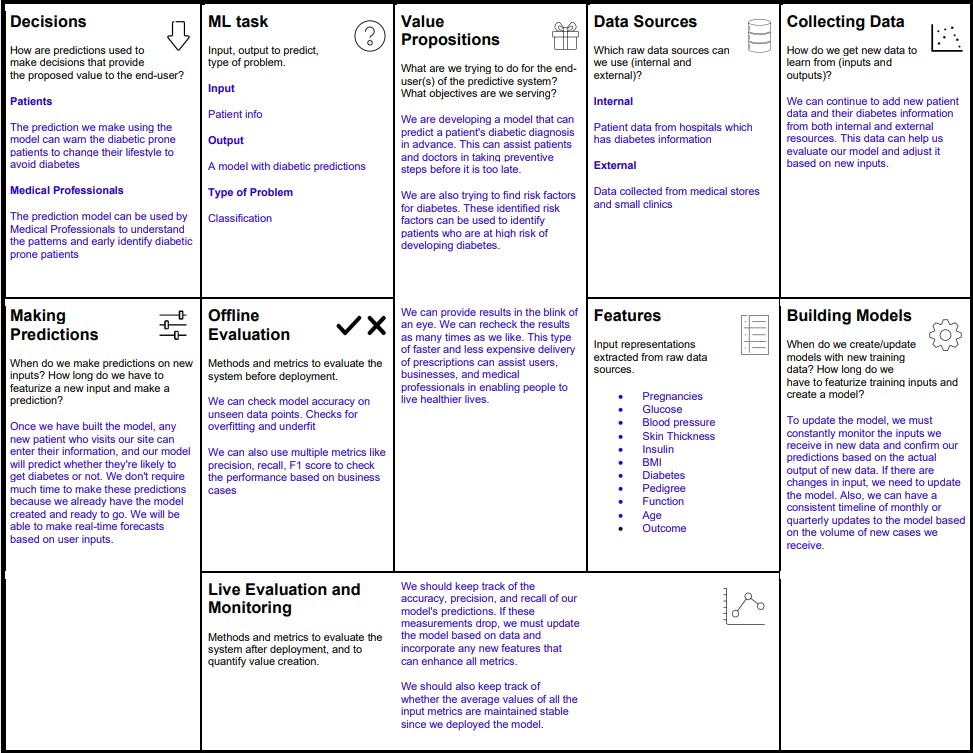

#### Loading Libraries and Data

In [78]:
# Load Libraries
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import xgboost as xg
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

## Change Wroking Directory
os.chdir('C:\\Users\\mahen\\OneDrive - University of California, Davis\\Desktop\\School\\Spring\\BAX 453\\')

In [79]:
# Load Data
data =  pd.read_csv("assignment4.csv")
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [80]:
### Removing Null rows
data = data[(data["Glucose"]!=0) & (data["BloodPressure"]!=0) & (data["BMI"]!=0)]

y = data["Outcome"]
X = data.loc[:, data.columns != "Outcome"]

### Method 1 - Logistic Regression

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### Model Building and Prediction

In [82]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

C:\Users\mahen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Accuracy

In [83]:
metrics.accuracy_score(y_test,y_pred) * 100

80.0

#### Confusion Matrix

In [84]:
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,89,13,102
1,16,27,43
All,105,40,145


**The actual values are:**

The patients who actually don’t have a diabetes = 106

The patients who actually do have a diabetes = 43

**The predicted values are:**

Number of patients who were predicted as not having a diabetes = 105

Number of patients who were predicted as having a diabetes = 40

**All the values we obtain above have a term. Let’s go over them one by one:**

The cases in which the patients actually did not have diabetes and our model also predicted as not having it is called the True Negatives. For our matrix, **True Negatives** = 89.

The cases in which the patients actually have diabetes and our model also predicted as having it are called the True Positives. For our matrix, **True Positives** = 27

However, there are are some cases where the patient actually has no diabetes, but our model has predicted that they do. This kind of error is the Type I Error and we call the values as False Positives. For our matrix, **False Positives** = 13

 Similarly, there are are some cases where the patient actually has diabetes, but our model has predicted that he/she don’t. This kind of error is the Type II Error and we call the values as False Negatives.  For our matrix, **False Negatives** = 16

#### Precession, Recall and F1 Score

In [85]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       102
           1       0.68      0.63      0.65        43

    accuracy                           0.80       145
   macro avg       0.76      0.75      0.76       145
weighted avg       0.80      0.80      0.80       145



**Precision** = 0.68

Precision is the ratio between the True Positives and all the Positives. Of all the patients whom we predicted as diabetic,68% we are actually having diabetes.

**Recall** = 0.63

The recall is the measure of our model correctly identifying True Positives. Of all the patients who actually have diabetes,63% we correctly identified as having diabetes.

**F1 score** =  0.65

F1 Score is Trade of between both precession and recalls. The more the better 

#### ROC

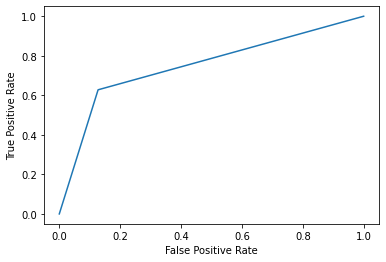

In [87]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

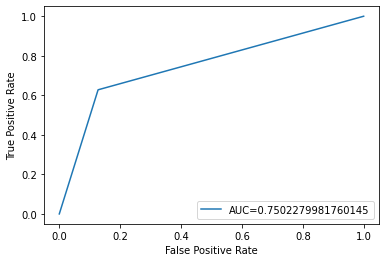

In [88]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

The AUC values is 0.75 which closer to the 1. This indicates that model is performing well/decently

### Method 2 - Random Forest

The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree. It's a supervised learning method that may be used for classification as well as regression.

#### Model Building and Prediction

In [89]:
# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier

# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_jobs=2,random_state=0)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(X_train, y_train)

# Extract single tree
estimator = clf.estimators_[5]

### Prediction
y_pred = clf.predict(X_test)

#### Confusion Matrix

In [90]:
# Create confusion matrix
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'],margins = True)

Predicted,0,1,All
Actual,,,
0,86,16,102
1,15,28,43
All,101,44,145


**The actual values are:**

The patients who actually don’t have a diabetes = 102

The patients who actually do have a diabetes = 43

**The predicted values are:**

Number of patients who were predicted as not having a diabetes = 101

Number of patients who were predicted as having a diabetes = 44

**All the values we obtain above have a term. Let’s go over them one by one:**

The cases in which the patients actually did not have diabetes and our model also predicted as not having it is called the True Negatives. For our matrix, **True Negatives** = 86.

The cases in which the patients actually have diabetes and our model also predicted as having it are called the True Positives. For our matrix, **True Positives** = 28

However, there are are some cases where the patient actually has no diabetes, but our model has predicted that they do. This kind of error is the Type I Error and we call the values as False Positives. For our matrix, **False Positives** = 16

 Similarly, there are are some cases where the patient actually has diabetes, but our model has predicted that he/she don’t. This kind of error is the Type II Error and we call the values as False Negatives.  For our matrix, **False Negatives** = 15

#### RMSE

In [91]:
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("RMSE: %f" % (rmse))

RMSE: 0.462378


#### Accuracy

In [92]:
metrics.accuracy_score(y_test,y_pred) * 100

78.62068965517241

#### Precession, Recall and F1 Score

In [93]:
print(metrics.classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       102
           1       0.64      0.65      0.64        43

    accuracy                           0.79       145
   macro avg       0.74      0.75      0.75       145
weighted avg       0.79      0.79      0.79       145



**Precision** = 0.64

Precision is the ratio between the True Positives and all the Positives. Of all the patients whom we predicted as diabetic,64% we are actually having diabetes.

**Recall** = 0.65

The recall is the measure of our model correctly identifying True Positives. Of all the patients who actually have diabetes,65% we correctly identified as having diabetes.

**F1 score** =  0.64 

F1 Score is Trade of between both precession and recalls. The more the better 

#### Variable Importance

In [94]:
pd.DataFrame({"Variable Name": X_train.columns,
              "% of Importance": clf.feature_importances_}).sort_values(by="% of Importance", ascending=False)

,Variable Name,% of Importance
1,Glucose,0.237637
5,BMI,0.174242
7,Age,0.139364
6,DiabetesPedigreeFunction,0.126637
0,Pregnancies,0.084948
2,BloodPressure,0.084796
4,Insulin,0.078792
3,SkinThickness,0.073585


#### ROC

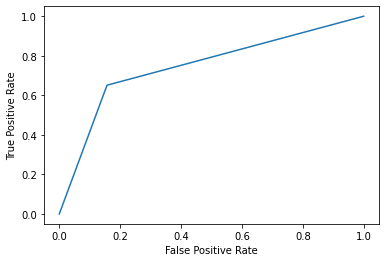

In [95]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### AUC

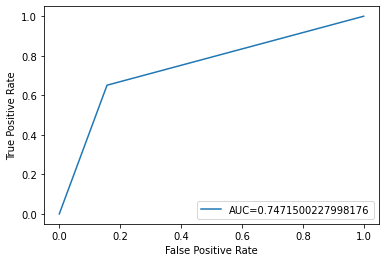

In [96]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

The AUC values is 0.75 which closer to the 1. This indicates that model is performing well/decently

### Method 3 - XGBoost

XGBoost is a boosting method in which the algorithm start with a weak model. The model draws inferences about features and parameters, then improves the model based on its results. Unlike random forest, where we construct models in parallel, XGBoost builds models sequentially. We continue to improve our model in response to new results, finally settling on the optimal functioning model.

#### Create another classification model using XGBoost for the same dataset

In [97]:
### XGBoost
xgboost = xg.XGBClassifier(n_estimators=100, learning_rate=0.1, gamma=0, subsample=0.5,colsample_bytree=1, max_depth=8,use_label_encoder=False)

### Model Fitting
xgboost.fit(X_train,y_train)

### Prediction
y_pred=xgboost.predict(X_test)

[00:17:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


#### Confusion Matrix

In [98]:
# Create confusion matrix
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,1,All
Actual,,,
0,83,19,102
1,11,32,43
All,94,51,145


**The actual values are:**

The patients who actually don’t have a diabetes = 102

The patients who actually do have a diabetes = 43

**The predicted values are:**

Number of patients who were predicted as not having a diabetes = 94

Number of patients who were predicted as having a diabetes = 51

**All the values we obtain above have a term. Let’s go over them one by one:**

The cases in which the patients actually did not have diabetes and our model also predicted as not having it is called the True Negatives. For our matrix, **True Negatives** = 83.

The cases in which the patients actually have diabetes and our model also predicted as having it are called the True Positives. For our matrix, **True Positives** = 32

However, there are are some cases where the patient actually has no diabetes, but our model has predicted that they do. This kind of error is the Type I Error and we call the values as False Positives. For our matrix, **False Positives** = 19

 Similarly, there are are some cases where the patient actually has diabetes, but our model has predicted that he/she don’t. This kind of error is the Type II Error and we call the values as False Negatives.  For our matrix, **False Negatives** = 11

#### RMSE

In [99]:
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("RMSE: %f" % (rmse))

RMSE: 0.454859


#### Accuracy

In [100]:
metrics.accuracy_score(y_test,y_pred) * 100

79.3103448275862

#### Classification Report

In [101]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85       102
           1       0.63      0.74      0.68        43

    accuracy                           0.79       145
   macro avg       0.76      0.78      0.76       145
weighted avg       0.81      0.79      0.80       145



**Precision** = 0.63

Precision is the ratio between the True Positives and all the Positives. Of all the patients whom we predicted as diabetic,63% we are actually having diabetes.

**Recall** = 0.74

The recall is the measure of our model correctly identifying True Positives. Of all the patients who actually have diabetes,74% we correctly identified as having diabetes.

**F1 score** =  0.68 

F1 Score is Trade of between both precession and recalls. The more the better 

#### Variable Importance

In [102]:
pd.DataFrame({"Variable Name": X_train.columns,
              "% of Importance": xgboost.feature_importances_}).sort_values(by="% of Importance", ascending=False)

,Variable Name,% of Importance
1,Glucose,0.202605
5,BMI,0.134383
7,Age,0.120196
4,Insulin,0.115672
0,Pregnancies,0.111145
6,DiabetesPedigreeFunction,0.110540
3,SkinThickness,0.105195
2,BloodPressure,0.100264


#### ROC

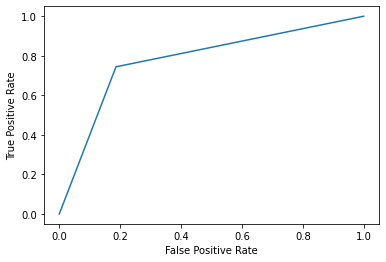

In [103]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### AUC

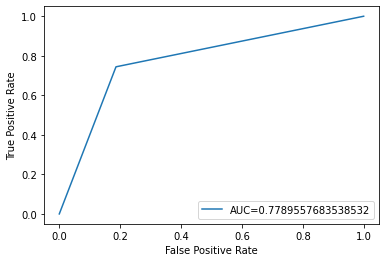

In [104]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

The AUC values is 0.78 which closer to the 1. This indicates that model is performing well/decently

**Of all the method XGboost has the best recall, precession and F1 Score and Maximim AUC. we can use that model for future predictions**